<h1>Market Analysis</h1>
<h2>Task Details</h2>
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

<h1>Section 01: Exploratory Data Analysis</h1>
<ul><li>Are there any null values or outliers? How will you wrangle/handle them?</li>
<li>Are there any variables that warrant transformations?</li>
<li>Are there any useful variables that you can engineer with the given data?</li>
<li>Do you notice any patterns or anomalies in the data? Can you plot them?</li>

In [4]:
#Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#Load data set
data=pd.read_csv('/content/marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [5]:
#Detemine number of rows and columns
data.shape

(2240, 28)

In [6]:
#Determine data summary
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Check featues, data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

<h1>Observations:</h1>
<ul><li>Column 'Income' with space at the begining.</li>
<li>Column 'Income' with null values.</li>
<li>Column 'Income' with data type 'object'.</li>
<li>Column 'Income' with missing values.</li><ul> 

<h1>Next Step:</h1>
<ul><li>Remove space from column name 'Income'.</li>
<li>Convert Income data type to 'float'.</li>
<li>Imputation of null values for feature 'Income'.</li><ul>


In [8]:
#Remove space from column name 'Income'.
data.columns=data.columns.str.replace(" ","")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
#Delete $
data['Income']=data['Income'].str.replace('$','')

#Delete ','
data['Income']=data['Income'].str.replace(',','')

#Convert 'Income' data type to 'float'.
data['Income']=data['Income'].astype('float')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<h1>Observation:</h1>
Null values in feature 'Income'

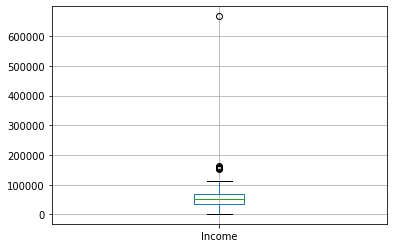

In [11]:
data.Income.plot(kind='box')
plt.grid()

<h1>Observation:</h1>
There are outliers in feature 'Income', some customers have very high income which are most likely natural outliers. So we will impute null values with median to minimize the effect the outliers.

In [12]:
data['Income']=data['Income'].fillna(data.Income.median())

In [13]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Year_Birth                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                  AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Kidhome                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Teenhome                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recency                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
MntWines               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
MntFruits              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
MntMeatProducts        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MntFishProducts           AxesSubplot(0.125,0.321957;0.168478x0.16413)
MntSweetProducts       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MntGoldProds           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
NumDealsPurchases      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
NumWebPurchases              AxesSubplot(0.125,0.125;0.168478x0.16413)
NumCatalogPurchases       AxesSubplot(0.327174,0.125;0.168478x0.16413)
NumSto

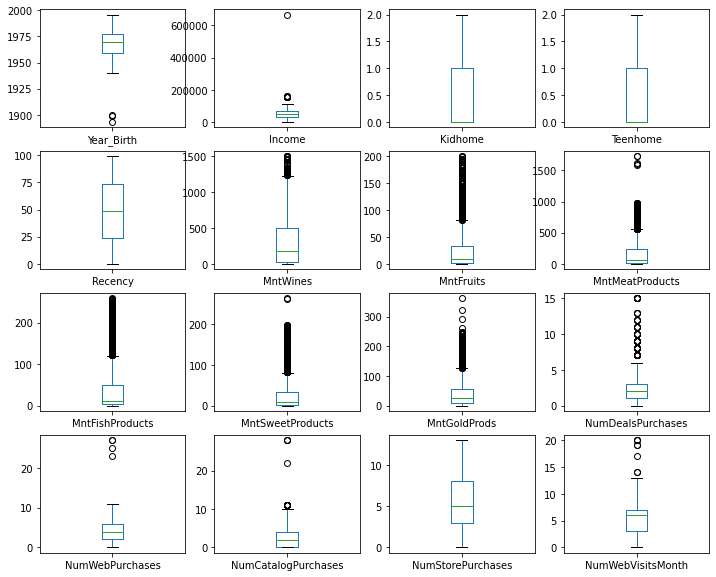

In [14]:
#Plot numerical variables
data_plot=data.drop(['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'], axis=1)
data_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,10))

<h1>Observation:</h1>
<ul><li>Outliers can be found in many cloumns, probably because of different buying behaviour.</li>
<li>'Year_Birth' before 1900 is not possible.</li></ul>
<h1>Next step:<h1>
<ul><li>Convert 'Year_Birth' to 'Age'.</li>
<li>Impute values of age >120.</li></ul>

In [15]:
#Converting birthdate to age
import datetime
now = datetime.datetime.now()
data['Age'] = now.year - data['Year_Birth']

In [16]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32


In [17]:
#Checking correlation of other variables with 'Age'
data_corr = data.corr(method='kendall').unstack().sort_values(kind='quicksort', ascending=False).reset_index()
data_corr.rename(columns={'level_0':'Variable 1','level_1':'Variable 2', 0:'Correlation coefficient'}, inplace=True)
data_corr[data_corr['Variable 1']=='Age']

,Variable 1,Variable 2,Correlation coefficient
0,Age,Age,1.000000
127,Age,Teenhome,0.316054
195,Age,MntWines,0.161118
203,Age,Income,0.151713
216,Age,NumCatalogPurchases,0.131685
223,Age,NumStorePurchases,0.119001
227,Age,NumWebPurchases,0.116628
255,Age,MntMeatProducts,0.078941
266,Age,NumDealsPurchases,0.065301
269,Age,AcceptedCmp4,0.055132


<hq>Observation:</h1>
<ul><li>There no strong correlation of 'Age' with other variables, so we will replace 'Age'>120 will median value.</li></ul>

In [18]:
data['Age'].median

<bound method Series.median of 0       51
1       60
2       63
3       54
4       32
        ..
2235    45
2236    44
2237    45
2238    43
2239    52
Name: Age, Length: 2240, dtype: int64>

In [19]:
data['Age']= np.where(data['Age']>120, 51, data['Age'])
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,52.096875
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.694144
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000


<h1>Compressing the data by merging similar columns into one</h1>
<ul><li>Minors = Kidhome + Teenhome</li>
<li>Total amount spent = Amount spent for wine + fruits + meat + fish + sweet + gold</li>
<li>Number of all purchases = Purchases in store + catalog + web + deals</li>
<li>Remote purchases = Purchases in catalog + web</li>
<li>Marketing responsiveness = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 +AcceptedCmp4 + AcceptedCmp5 + Response<li></ul>
<h2>Transformation:</h2>
<ul><li>Feature "Dt_customer" converted to "Customer_since"</li>
<li>Delete "Year_birth", but keep "Age"</li>



In [20]:
#Minors in household
data['Minors']= data['Kidhome'] + data['Teenhome']

#Total amount spent
data['Amount_spent']= data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

#Amount spent on luxury items
data['Lux_spent']= data['MntGoldProds'] + data['MntWines']

#Number of total purchases
data['NumPur']= data['NumStorePurchases'] + data['NumCatalogPurchases'] + data['NumWebPurchases'] + data['NumDealsPurchases']

#Number of remote purchases
data['RemPur']= data['NumCatalogPurchases'] + data['NumWebPurchases']

#Marketing responsiveness
data['Responsiveness']= data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

#Convert 'Dt_customer' to 'Customer_since'
data['Customer_since']= pd.DatetimeIndex(data['Dt_Customer']).year
data=data.drop(['Dt_Customer'], axis=1)

#Drop 'Year_Birth'
data= data.drop(['Year_Birth'], axis=1)

data.head()


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Minors,Amount_spent,Lux_spent,NumPur,RemPur,Responsiveness,Customer_since
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,1190,407,15,8,0,2014
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,577,501,18,10,1,2014
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,251,164,11,5,0,2014
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,11,10,4,1,0,2014
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,91,40,8,4,1,2014


In [21]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Minors', 'Amount_spent',
       'Lux_spent', 'NumPur', 'RemPur', 'Responsiveness', 'Customer_since'],
      dtype='object')

<h1>Explore dataset with correlation matrix</h1>

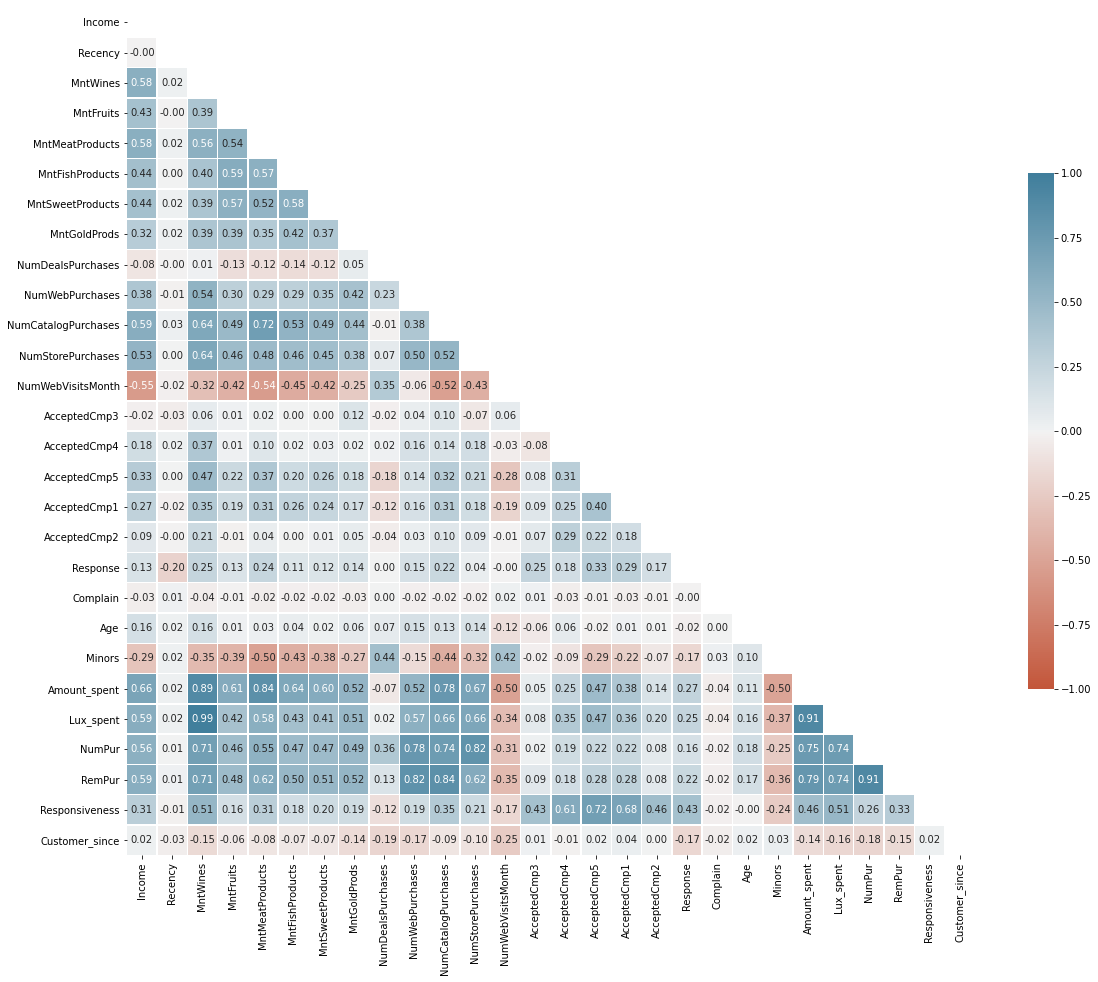

In [22]:
data_corr= data.drop(columns=['ID', 'Kidhome', 'Teenhome']).select_dtypes(include= np.number)

#Compute correlation matrix
corr= data_corr.corr()

#Generate a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype=bool))

#Set up matplotlib fig
f, ax= plt.subplots(figsize=(19, 19))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin= -1, vmax= 1, annot=True, fmt= '.2f', center=0, square=True, linewidths= .5, cbar_kws={'shrink': .5})

<h1>Explore effects of Income</h1>


In [23]:
data_corr= data.corr().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
data_corr.rename(columns={'level_0': 'Column_1', 'level_1': 'Column_2', 0: 'Correlation Coefficient'}, inplace= True)
data_corr[data_corr['Column_1']== 'Income']

,Column_1,Column_2,Correlation Coefficient
27,Income,Income,1.000000
78,Income,Amount_spent,0.664775
101,Income,NumCatalogPurchases,0.586826
104,Income,Lux_spent,0.585988
105,Income,RemPur,0.585698
109,Income,MntMeatProducts,0.577805
111,Income,MntWines,0.576903
122,Income,NumPur,0.563450
133,Income,NumStorePurchases,0.526600
196,Income,MntFishProducts,0.437564


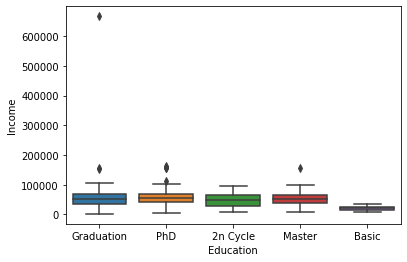

In [24]:
sns.boxplot(x="Education", y='Income', data=data)

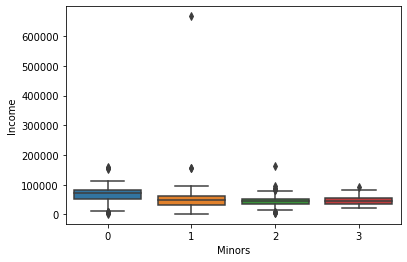

In [25]:
sns.boxplot(x= 'Minors', y='Income', data=data)

<h1>Observations</h1>
<h2>Income is highly corrrelated with:</h2>
<ul><li>Total Amount spent</li>
<li>Catalog purchases</li>
<li>Total amount spent on luxury items</li>
<li>Total amount spent on remote purchases</li>
<li>Amount spent for meat purchases</li>
<li>Amount spent for wine purchases</li>
<li>Number of purchases</li>
<li>Number of store purchases</li>
<li>Higher education (above basic)</li></ul>

<h2>Income is negatively correlated with:</h2>
<ul><li>Monthly websote visits</li>
<li>Presence of minors in household</li></ul>




<h1>Effect of minor on other variables

In [26]:
data_corr= data.corr().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
data_corr.rename(columns={'level_0': 'Column_1', 'level_1': 'Column_2', 0: 'Correlation Coefficient'}, inplace= True)
data_corr[data_corr['Column_1']== 'Minors']

,Column_1,Column_2,Correlation Coefficient
5,Minors,Minors,1.000000
70,Minors,Teenhome,0.698433
71,Minors,Kidhome,0.689971
192,Minors,NumDealsPurchases,0.439684
214,Minors,NumWebVisitsMonth,0.418419
438,Minors,Age,0.095494
498,Minors,Customer_since,0.032215
500,Minors,Complain,0.031066
539,Minors,Recency,0.018053
617,Minors,ID,-0.000146


<h1>Observations:</h1>
<h2>Minor is positively correlated with:</h2>
<ul><li>Number of deals purchased</li>
<li>Number of web visits per month</li></ul>

<h2>The presence of Minors in household is negatively correlated with:</h2>
<ul><li>Amount spent on meat purchases</li>
<li>Total amount spent</li>
<li>Number of catalogue purchases</li>
<li>Amount spent on fish porducts</li>
<li>Amount spent on Fruits</li>
<li>Amount spent of sweets</li>
<li>Luxury items</li>
<li>Remote purchases</li>
<li>Amount spent on wine purchases</li>
<li>Number of store purchases</li>
<li>Income</li></ul>

<h1>Section 02: Statistical Analysis</h1>
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

<ul><li>What factors are significantly related to the number of store purchases?</li><li> Does US fare significantly better than the Rest of the World in terms of total purchases?</li><li> Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.</li><li> Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects).</li><li> Is there a significant relationship between geographical regional and success of a campaign?</li>

### 1. **What factors are significantly related to the number of store purchases?**



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


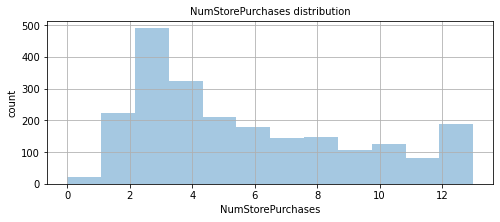

In [27]:
plt.figure(figsize=(8,3))
sns.distplot(data['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=10)
plt.ylabel('count')
plt.grid()


In [28]:
# Dropping 'ID' column since it is unique to every customer
data_reg= data.drop(['ID'], axis =1)
data_reg.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Minors,Amount_spent,Lux_spent,NumPur,RemPur,Responsiveness,Customer_since
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,1190,407,15,8,0,2014
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,577,501,18,10,1,2014
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,251,164,11,5,0,2014
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,11,10,4,1,0,2014
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,91,40,8,4,1,2014


In [29]:
# Perform one-hot encoding of categorical variables (basically creating separate column for each category of a variable column)
def create_dummies(data,column_name):
  dummies = pd. get_dummies(data[column_name], prefix= column_name)
  data=pd.concat([data,dummies], axis=1)
  return data

data_reg= create_dummies(data_reg, 'Education')
data_reg= create_dummies(data_reg, 'Marital_Status')
data_reg= create_dummies(data_reg, 'Country')
data_reg.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Minors,Amount_spent,Lux_spent,NumPur,RemPur,Responsiveness,Customer_since,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,1190,407,15,8,0,2014,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,577,501,18,10,1,2014,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,251,164,11,5,0,2014,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,11,10,4,1,0,2014,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,91,40,8,4,1,2014,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [30]:
data_reg.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Minors', 'Amount_spent',
       'Lux_spent', 'NumPur', 'RemPur', 'Responsiveness', 'Customer_since',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Country_AUS', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country_

In [31]:
# Dropping the categorical variables and NumStorePurchases and storing rest in a separate data frame
data_reg_dropped= data_reg.drop(['Education', 'Marital_Status', 'Country', 'NumStorePurchases'], axis=1)
data_reg_dropped.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Minors,Amount_spent,Lux_spent,NumPur,RemPur,Responsiveness,Customer_since,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,1,0,0,0,0,0,1,0,51,0,1190,407,15,8,0,2014,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,5,0,0,0,0,1,1,0,60,0,577,501,18,10,1,2014,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,2,0,0,0,0,0,0,0,63,1,251,164,11,5,0,2014,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,7,0,0,0,0,0,0,0,54,2,11,10,4,1,0,2014,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,7,1,0,0,0,0,1,0,32,1,91,40,8,4,1,2014,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [32]:
X= data_reg_dropped
y= data_reg['NumStorePurchases']

<ul><li>Fit linear regression model to training data (70% of dataset)</li>
<li>Evaluate predictions on test data (30% of dataset).</li><ul>


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
train_X, test_X, train_y, test_y = train_test_split(data_reg_dropped, y, test_size=0.3,random_state=1)

#Liner Regression model
reg = LinearRegression(normalize=True) 
reg.fit(train_X,train_y)

#Predictions
y_pred = reg.predict(test_X)


mean_absolute_error(test_y, y_pred)

9.381714981601806e-15

Identify features that significantly affect the number of store purchases, using permutation importance:

In [34]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.5 MB/s 


In [35]:
import eli5
from eli5.sklearn import PermutationImportance

perm=PermutationImportance(reg, random_state=0).fit(test_X, test_y)
eli5.show_weights(perm, feature_names= test_X.columns.tolist(), top=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
11.7184 ± 0.9437,NumPur
0.8250 ± 0.0583,RemPur
0.6097 ± 0.0352,NumDealsPurchases
0.5911 ± 0.0378,NumCatalogPurchases
0.5270 ± 0.0291,NumWebPurchases
0.0021 ± 0.0001,Amount_spent
0.0007 ± 0.0000,Lux_spent
0.0004 ± 0.0000,Education_Graduation
0.0003 ± 0.0000,MntMeatProducts
0.0003 ± 0.0000,Education_PhD


Most important features of Store purchases are Remore purchases, Number of deals purchased, Number of web purchases, Number of catalogue purchases.

### 2. Does US fare significantly better than the Rest of the World in terms of total purchases?**

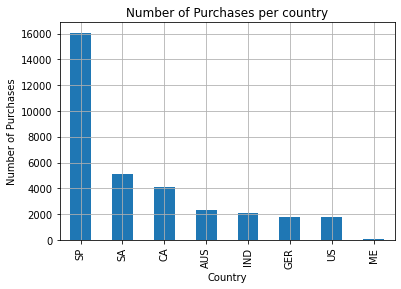

In [36]:
plt.figure()
data.groupby('Country')['NumPur'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Purchases per country')
plt.ylabel('Number of Purchases')
plt.grid()

US does not fare better in Total Purchases. Spain, South Africa, Canada, Australia and India have higher number of purchases than US.

### 3. **Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test**
<ul><li>Plot relationship between amount spent in gold in last 2 years (MntGoldProds) and Number of in store purchases.</li>


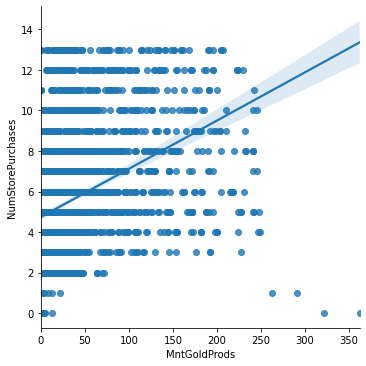

In [37]:
sns.lmplot(x= 'MntGoldProds', y='NumStorePurchases', data= data);

Findings: There is a positive relationship, but is it significant?

In [38]:
!pip install scipy

In [39]:
from scipy import stats
tau, p_value = stats.kendalltau(data['MntGoldProds'], data['NumStorePurchases'])
p_value

4.752746314649227e-152

Findings: People who spent an above average amount on gold have indeed more in store purchases. This correlation is statistically significant, however, this does not prove causation that people who spent money on gold are more conservative and prefer buying in stores.

### 4. **Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?**

We will compare MntFishProducts between Married PhD candidates and all other customers:

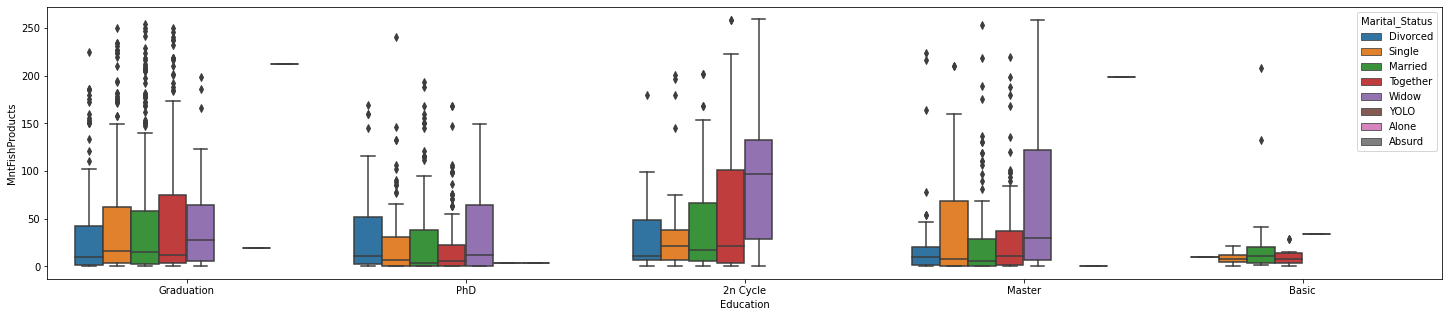

In [40]:
plt.figure(figsize=(25,5))
sns.boxplot(x= data['Education'], y= data['MntFishProducts'], hue= data['Marital_Status'])

Findings: Ph.d Married people do not spend more on Fish Products.

**Now to find out what other factors are significantly related to amount spent of Fish:**
<ul><li>Like with the analysis of NumStorePurchases above, we will use use a linear regression model with MntFishProducts as the target variable, and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish</li>
<li>Begin by plotting the target variable:</li></ul>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


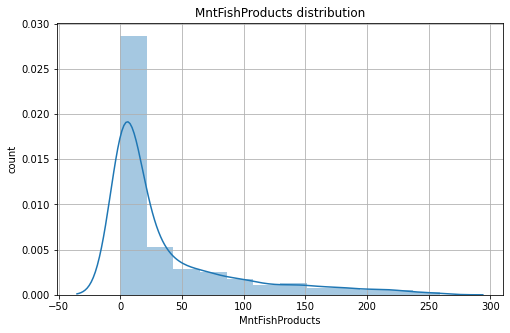

In [41]:
plt.figure(figsize=(8,5))
sns.distplot(data['MntFishProducts'], kde= 'False', hist=True, bins=12)
plt.title('MntFishProducts distribution')
plt.ylabel('count')
plt.grid()

In [42]:
#  now drop categorical columns like we did before for applying regression model
X= data_reg_dropped2= data_reg.drop(['Education', 'Marital_Status', 'Country', 'MntFishProducts'], axis=1)
y= data_reg_dropped['MntFishProducts']

<ul><li>Fit linear regression model to training data (70% of dataset)</li>
<li>Evaluate predictions on test data (30% of dataset)</li></ul>

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

train_X, test_X, train_y, test_y= train_test_split(data_reg_dropped2, y, test_size= 0.2, random_state=42)

#Linear Regression model
reg= LinearRegression(normalize=True)
reg.fit(train_X, train_y)

#prediction
y_pred= reg.predict(test_X)
mean_absolute_error(test_y, y_pred)

5.026247275528663e-13

Identify features that significantly affect the amount spent on fish, using permutation importance:


In [44]:
import eli5
from eli5.sklearn import permutation_importance

perm= PermutationImportance(reg, random_state=0).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist(), top=10)


Weight,Feature
321.0849 ± 22.6471,Amount_spent
42.3584 ± 1.8337,MntMeatProducts
27.4869 ± 2.4586,MntWines
27.2073 ± 2.1624,Lux_spent
1.4830 ± 0.1643,MntSweetProducts
1.3452 ± 0.1872,MntFruits
0.6726 ± 0.0701,MntGoldProds
0.1741 ± 0.0136,RemPur
0.0752 ± 0.0065,NumPur
0.0279 ± 0.0023,Responsiveness


Significant features are: Amount_spent, MntMeatPriducts, MntWines, Lux_spent

### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

1. Which marketing campaign is most successful?

Text(0.5, 1.0, 'Marketing Campaign Success Rate')

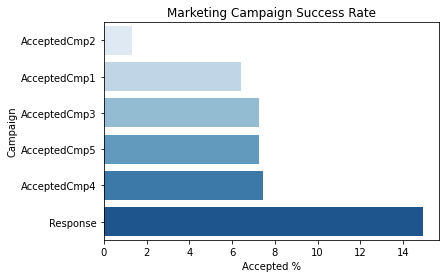

In [45]:
# Plot marketing campaign overall acceptance rates.
# Calculate success rate
campaign_success_rate= pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=campaign_success_rate.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted %')
plt.ylabel('Campaign')
plt.title('Marketing Campaign Success Rate', size=12)


Findings: The most recent campaign (column name: Response) is the most successful one.

### 2. What does the average customer look like for this company?

In [46]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Minors', 'Amount_spent',
       'Lux_spent', 'NumPur', 'RemPur', 'Responsiveness', 'Customer_since'],
      dtype='object')

In [47]:
#age
age= round(data['Age'].mean())
print('Avg age=', age)

#income
income= round(data['Income'].mean())
print('Avg Income=', income)

#customer since
customer_since= round(data['Customer_since'].mean())
print('Customer Since=', customer_since)

#TotalAmountSpent
TotalAmountSpent= round(data['Amount_spent'].mean())
print('Avg Amount Spent=', TotalAmountSpent)

#Responsiveness
Resp= data['Responsiveness'].mean()
print('Avg Responsiveness=', Resp)

#Number of minors in household
MinorHH= data['Minors'].mean()
print('Avg no. of minors=', MinorHH)

#Educatiom
edu= data['Education'].value_counts()
print('Avg Education Qualification=', edu)

#Marital_Status
marsta= data['Marital_Status'].value_counts()
print('Marital Status=', marsta)

#Recency
rec=data['Recency'].mean()
print('Recency=', rec)

Avg age= 52
Avg Income= 52238
Customer Since= 2013
Avg Amount Spent= 606
Avg Responsiveness= 0.29776785714285714
Avg no. of minors= 0.9504464285714286
Avg Education Qualification= Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Marital Status= Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Recency= 49.109375


An average customer:
<ol><li>is 52 years old</li>
<li>earns around 53k USD</li>
<li>is a custome since 2013</li>
<li>spent 606 USD in total</li>
<li>has responded to almost 0.3 campaigns</li>
<li>has one minor in household</li>
<li>is graduated</li>
<li>is married</li>
<li>made last purchase 49 days ago</li></ol>

### 3. Which products are performing best?

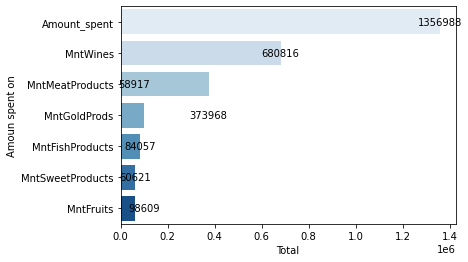

In [63]:
mnt_cols= pd.DataFrame(data[['Amount_spent', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(), columns=['Total']).reset_index()

#plot
ax=sns.barplot(x='Total', y='index', data=mnt_cols.sort_values('Total', ascending=False), palette='Blues')
plt.xlabel('Total')
plt.ylabel('Amoun spent on')

#put add text labels for each bar's value
for p,q in zip(ax.patches, mnt_cols['Total']):
  ax.text(x= q+40,
          y= p.get_y()+0.5,
          s=q,
          ha='center');

Findings:
Best performing products are Wines followed by Meat Products

### 3.Which channels are underperforming?

In [69]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Minors', 'Amount_spent',
       'Lux_spent', 'NumPur', 'RemPur', 'Responsiveness', 'Customer_since'],
      dtype='object')

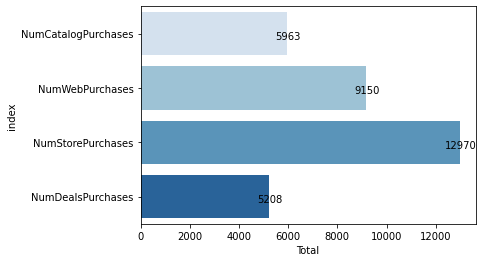

In [73]:
channels= pd.DataFrame(data[['NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(), columns=['Total']).reset_index()

# plot
bx= sns.barplot(x='Total', y='index', data=channels, palette='Blues')
plt.ylabel=['Channels']
plt.xlabel=['Total']
for p,q in zip(bx.patches, channels['Total']):
  bx.text(x= q+40,
          y= p.get_y()+0.5,
          s=q,
          ha='center');

Findings: Catalog is the most underperforming channel followed by Deals. Store is the strongest channel.

<h1>Conclusion</h1>
<ul><li>The most successful advertising campaign was the most recent campaign (column name: Response)</li>
<li>Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
<ul><li>Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens</li></ul></li>
<li>The most successful products are wines and meats (i.e. the average customer spent the most on these items)
<ul><li>Suggested action: Focus advertising campaigns on boosting sales of the less popular items</li></ul></li>
<li>The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels)</li>
<li>The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels)
<ul><li>Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers</li></ul></li></ul>